In [4]:
# Importing modules
import pandas as pd
import os
# Load the regular expression library
import re
# Import the wordcloud library
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim.corpora as corpora
from pprint import pprint
import pyLDAvis.gensim
import pickle 
import pyLDAvis

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Read data into papers
papers = pd.read_csv('../out/points.csv')
# Print head
papers.head()

# Remove the columns
papers = papers.drop(columns=['video_id', 'description', 'tags','channel','published_at','caption_length','caption_words_count'], axis=1)
# Print out the first rows of papers
papers.head()

,Unnamed: 0,title,captions
0,0,6 AMAZINGLY Compact Ways to Fold Clothes for P...,. [Music]. [Applause]. [Music]. [Applause]. [M...
1,1,Packing Cubes: What I learned after living out...,. So there is one question that seems. to spli...
2,2,How To Pack Light For A Long Trip,. [Music]. hi my name is Tiffany and I travel ...
3,3,How to Pack like a Minimalist,". Oh, would you look at that my fight departs ..."
4,4,One Bag Travel Essentials You Need For Every Trip,. traveling with one bag can be freeing. and a...


In [7]:
papers['video_text_processed'] = \
papers['captions'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)
# Remove punctuation
papers['video_text_processed'] = \
papers['video_text_processed'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['video_text_processed'] = \
papers['video_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
# papers['video_text_processed'].head()

print(papers['video_text_processed'].head())

0     music applause music applause music applause ...
1     so there is one question that seems to split ...
2     music hi my name is tiffany and i travel for ...
3     oh would you look at that my fight departs in...
4     traveling with one bag can be freeing and all...
Name: video_text_processed, dtype: object


<>:2: DeprecationWarning: invalid escape sequence \s
<>:5: DeprecationWarning: invalid escape sequence \.
<>:2: DeprecationWarning: invalid escape sequence \s
<>:5: DeprecationWarning: invalid escape sequence \.
C:\Users\user\AppData\Local\Temp\ipykernel_15676\3765388681.py:2: DeprecationWarning: invalid escape sequence \s
  papers['captions'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15676\3765388681.py:5: DeprecationWarning: invalid escape sequence \.
  papers['video_text_processed'].map(lambda x: re.sub('[,\.!?]', '', x))


In [8]:
# Join the different processed titles together.
long_string = ','.join(list(papers['video_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud

C:\Users\user\miniconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


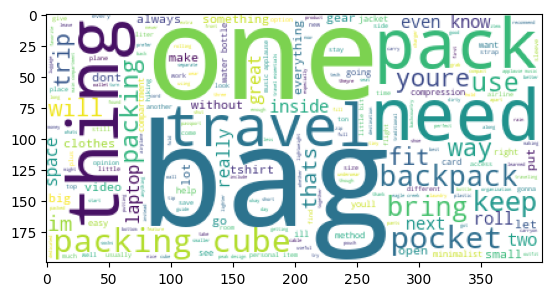

In [9]:
imgplot = plt.imshow(wordcloud.to_image())
plt.show()

In [10]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
            if word not in stop_words] for doc in texts]
data = papers.video_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

['music', 'applause', 'music', 'applause', 'music', 'applause', 'music', 'applause', 'music', 'applause', 'music', 'applause', 'music', 'applause', 'music']
[(0, 7), (1, 8)]


In [14]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                    id2word=id2word,
                                    num_topics=num_topics)
# Print the Keyword in the 10 topics
# pprint(lda_model.print_topics())


In [25]:
generated_topics=lda_model.show_topics(num_topics=10, num_words=10, log=False, formatted=False)
for topic in generated_topics:
    index,words = topic
    print("topic #",index)
    for word in words:
        print(word)

topic # 0
('like', 0.010846236)
('one', 0.009922634)
('pack', 0.009489632)
('bag', 0.009300824)
('packing', 0.008653007)
('need', 0.0082387235)
('travel', 0.008204475)
('youre', 0.0063186255)
('also', 0.0062215985)
('bring', 0.006103069)
topic # 1
('pack', 0.0067353924)
('need', 0.005659556)
('like', 0.0055366596)
('also', 0.005107251)
('one', 0.005001071)
('youre', 0.004894467)
('travel', 0.0047264267)
('bring', 0.0043498087)
('bag', 0.0041628666)
('get', 0.00400144)
topic # 2
('packing', 0.01382429)
('one', 0.013715018)
('like', 0.011600705)
('travel', 0.010866304)
('pack', 0.009651734)
('bag', 0.0091613345)
('need', 0.008009928)
('also', 0.0066740885)
('cube', 0.005529376)
('backpack', 0.0051749335)
topic # 3
('music', 0.0155954845)
('applause', 0.014066997)
('one', 0.012874827)
('like', 0.01181808)
('bag', 0.010661234)
('packing', 0.008907573)
('travel', 0.008102037)
('need', 0.007700717)
('youre', 0.0075653805)
('pack', 0.006627884)
topic # 4
('one', 0.011128367)
('like', 0.009838

(0, '0.011*"like" + 0.010*"one" + 0.009*"pack" + 0.009*"bag" + 0.009*"packing" + 0.008*"need" + 0.008*"travel" + 0.006*"youre" + 0.006*"also" + 0.006*"bring"')
(1, '0.007*"pack" + 0.006*"need" + 0.006*"like" + 0.005*"also" + 0.005*"one" + 0.005*"youre" + 0.005*"travel" + 0.004*"bring" + 0.004*"bag" + 0.004*"get"')
(2, '0.014*"packing" + 0.014*"one" + 0.012*"like" + 0.011*"travel" + 0.010*"pack" + 0.009*"bag" + 0.008*"need" + 0.007*"also" + 0.006*"cube" + 0.005*"backpack"')
(3, '0.016*"music" + 0.014*"applause" + 0.013*"one" + 0.012*"like" + 0.011*"bag" + 0.009*"packing" + 0.008*"travel" + 0.008*"need" + 0.008*"youre" + 0.007*"pack"')
(4, '0.011*"one" + 0.010*"like" + 0.009*"bag" + 0.007*"packing" + 0.007*"pack" + 0.006*"need" + 0.006*"travel" + 0.005*"pocket" + 0.005*"youre" + 0.005*"things"')
(5, '0.010*"like" + 0.008*"packing" + 0.008*"need" + 0.008*"bring" + 0.008*"travel" + 0.008*"also" + 0.007*"pack" + 0.007*"one" + 0.006*"bag" + 0.005*"youre"')
(6, '0.010*"packing" + 0.010*"like"

In [ ]:
doc_lda = lda_model[corpus]

In [12]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.001377 -0.007559       1        1  38.389711
2     -0.005939  0.017601       2        1  36.003846
3      0.004838 -0.001820       3        1  15.101259
1     -0.019746 -0.001230       4        1   9.816769
7      0.005015 -0.014067       5        1   0.470788
5      0.020180  0.002002       6        1   0.141414
9      0.001939  0.004673       7        1   0.019054
0     -0.018432 -0.004982       8        1   0.019054
6      0.005330  0.005096       9        1   0.019053
8      0.005438  0.000286      10        1   0.019052, topic_info=          Term       Freq      Total Category  logprob  loglift
144       like  44.000000  44.000000  Default  30.0000  30.0000
187    packing  40.000000  40.000000  Default  29.0000  29.0000
174        one  36.000000  36.000000  Default  28.0000  28.0000
22         bag  31.000000  31.000000  Default  27.0000  27.0000
276     travel  27.000000  27.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
234      small   0.001661   9.924972  Topic10  -5.8779  -0.1296
238  something   0.001756  11.257418  Topic10  -5.8225  -0.2002
133       keep   0.001905  14.393099  Topic10  -5.7409  -0.3643
538     pocket   0.001835  13.029052  Topic10  -5.7781  -0.3020
166       next   0.001714  11.045150  Topic10  -5.8467  -0.2053

[740 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
572       1  0.732083  accommodation
575       1  0.762518          admin
997       1  0.432211       airlines
997       2  0.216105       airlines
998       1  0.516493       airplane
...     ...       ...            ...
449       3  0.173700          youre
449       4  0.057900          youre
995       1  0.474374          youve
995       2  0.474374          youve
996       1  0.736744         zipper

[809 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 4, 2, 8, 6, 10, 1, 7, 9])